# Peter Moss Acute Myeloid / Lymphoblastic Leukemia AI Research Project

## Detecting Acute Lymphoblastic Leukemia With Keras & Tensorflow 
**Using the ACUTE LEUKEMIA CLASSIFICATION USING CONVOLUTION NEURAL NETWORK IN CLINICAL DECISION SUPPORT SYSTEM paper & ALL_IDB2**    

![Peter Moss Acute Myeloid / Lymphoblastic Leukemia AI Research Project](https://www.PeterMossAmlAllResearch.com/media/images/banner.png)

In this notebook you will create and train a Convolutional Neural Network, (KAllCNN_IDB2), to detect Acute Lymphoblastic Leukemia (ALL) using Keras & Tensorflow on Google Colab. The architecture you will create is based on the network proposed in the [ACUTE LEUKEMIA CLASSIFICATION USING CONVOLUTION NEURAL NETWORK IN CLINICAL DECISION SUPPORT SYSTEM](https://airccj.org/CSCP/vol7/csit77505.pdf "ACUTE LEUKEMIA CLASSIFICATION USING CONVOLUTION NEURAL NETWORK IN CLINICAL DECISION SUPPORT SYSTEM") paper by Thanh.TTP, Giao N. Pham, Jin-Hyeok Park, Kwang-Seok Moon, Suk-Hwan Lee, and Ki-Ryong Kwon.

This notebook is written by [Adam Milton-Barker](https://www.petermossamlallresearch.com/team/adam-milton-barker/profile "Adam Milton-Barker") and based on a notebook written by [Amita Kapoor](https://www.petermossamlallresearch.com/team/amita-kapoor/profile "Amita Kapoor"), and [Taru Jain](https://www.petermossamlallresearch.com/students/student/taru-jain/profile "Taru Jain"), one of the students from the [AML/ALL AI Student Program](https://www.petermossamlallresearch.com/students/ "AML/ALL AI Student Program").


# ALL Image Database for Image Processing

![Acute Lymphoblastic Leukemia Image Database for Image Processing](https://www.petermossamlallresearch.com/media/images/repositories/ALL_IDB1_Augmented_Slides.png)
_Fig 1. Samples of augmented data generated using ALL_IDB1 from the Acute Lymphoblastic Leukemia Image Database for Image Processing dataset._  


The [Acute Lymphoblastic Leukemia Image Database for Image Processing](https://homes.di.unimi.it/scotti/all/) dataset created by [Fabio Scotti, Associate Professor Dipartimento di Informatica, Università degli Studi di Milano](https://homes.di.unimi.it/scotti/) is used in this notebook, you will use the **ALL_IDB2** dataset.

## Gain Access To ALL-IDB

You you need to be granted access to use the Acute Lymphoblastic Leukemia Image Database for Image Processing dataset. You can find the application form and information about getting access to the dataset on [this page](https://homes.di.unimi.it/scotti/all/#download) as well as information on how to contribute back to the project [here](https://homes.di.unimi.it/scotti/all/results.php).

# Clone AML & ALL Classifiers Repository

First of all you should clone the [AML & ALL Classifiers](https://github.com/AMLResearchProject/AML-ALL-Classifiers/ "AML & ALL Classifiers") repo to your device. To do this you can navigate to the location you want to clone the repository to on your device using terminal (cd Your/Clone/Location), and then use the following command:

```
  $ git clone https://github.com/AMLResearchProject/AML-ALL-Classifiers.git
```

Once you have used the command above you will see a directory called **AML-ALL-Classifiers** in the location you chose to clone the repo to. In terminal, navigate to the **AML-ALL-Classifiers/Python/_Keras/AllCNN/Paper_1/ALL_IDB2/Non_Augmented/** directory, this is your project root directory.

# Google Drive / Colab 

## Upload Project Root To Google Drive
Now you need to upload the project root to your Google Drive, placing the tif files from the ALL_IDB2 dataset in the **Model/Data/Training/** directory.

## Mount Google Drive In Colab  

![Peter Moss Acute Myeloid / Lymphoblastic Leukemia AI Research Project](https://www.PeterMossAmlAllResearch.com/media/images/repositories/Colab.png)
_Fig 2. Example of Colab connected to Google Drive._

The first step is to mount your Google Drive in Colab.  

**To do this execute the following code block and follow the steps provided:**

In [1]:
%matplotlib inline

import sys
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# Install & Import Requirements
**Install and import requirements by executing the following code block:**

In [2]:
!pip install keras_metrics

import os,  cv2, keras, keras_metrics, matplotlib.image, random
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '0' 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from keras import backend as K
from keras import layers
from keras.layers import Activation, Dense, Dropout, Conv2D
from keras.layers import Flatten, MaxPooling2D, ZeroPadding2D
from keras.models import load_model, Model, model_from_json, Sequential
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.utils import np_utils

from numpy.random import seed

from pathlib import Path

from scipy import ndimage
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

from tensorflow import set_random_seed

%matplotlib inline

seed(3)
set_random_seed(3)

Using TensorFlow backend.


# Program Settings
Update the settings below to match the locations of the dataset, augmented and test directories on your Google Drive.. The Classes directory path is added allowing the files in the Classes directory to be executed. 

**Once you have updated the settings below, execute the following code block:**

In [3]:
local_drive = "/content/gdrive/My Drive/"
project_root = "AMLResearchProject/AML-ALL-Classifiers/Python/_Keras/AllCNN/Paper_1/ALL_IDB2/Non_Augmented/"
project_root_full = local_drive + project_root

sys.path.append(project_root_full + 'Classes')

import Data as AllCnnData
import Helpers as AllCnnHelpers

core = AllCnnHelpers.Helpers("Classifier", project_root_full)
configs = core.confs

model_root_path = project_root_full + configs["model_root"]
model_path = model_root_path + "/" + configs["model_file"]

data_dir = model_root_path + configs["data_dir"]
training_dir = model_root_path + data_dir + "/" + configs["training_dir"]
validation_dir = model_root_path + data_dir + "/" + configs["validation_dir"]

batch_size = configs["batch_size"]
epochs = configs["epochs"]
val_steps = configs["val_steps"]

core.logger.info("Class Path: " + project_root + 'Classes')
core.logger.info("Data Path: " + data_dir)
core.logger.info("Model Path: " + model_path)
core.logger.info("Model Root Dir: " + model_root_path)
core.logger.info("Project Root: " + project_root)
core.logger.info("Program settings setup complete.")

2019-10-26 20:01:10,599 - Classifier - INFO - Helpers class initialization complete.
2019-10-26 20:01:10,613 - Classifier - INFO - Class Path: AMLResearchProject/AML-ALL-Classifiers/Python/_Keras/AllCNN/Paper_1/ALL_IDB2/Non_Augmented/Classes
2019-10-26 20:01:10,620 - Classifier - INFO - Data Path: /content/gdrive/My Drive/AMLResearchProject/AML-ALL-Classifiers/Python/_Keras/AllCNN/Paper_1/ALL_IDB2/Non_Augmented/Model/Data/Training
2019-10-26 20:01:10,623 - Classifier - INFO - Model Path: /content/gdrive/My Drive/AMLResearchProject/AML-ALL-Classifiers/Python/_Keras/AllCNN/Paper_1/ALL_IDB2/Non_Augmented/Model/model.json
2019-10-26 20:01:10,627 - Classifier - INFO - Model Root Dir: /content/gdrive/My Drive/AMLResearchProject/AML-ALL-Classifiers/Python/_Keras/AllCNN/Paper_1/ALL_IDB2/Non_Augmented/Model
2019-10-26 20:01:10,630 - Classifier - INFO - Project Root: AMLResearchProject/AML-ALL-Classifiers/Python/_Keras/AllCNN/Paper_1/ALL_IDB2/Non_Augmented/
2019-10-26 20:01:10,632 - Classifier -

# Prepare Your Data
Now you need to prepare your training and validation data. 

## Proposed Training / Validation Sets
In the paper the authors use the **ALL_IDB1** dataset. The paper proposes the following training and validation sets proposed in the paper, where **Normal cell** refers to ALL negative examples and **Abnormal cell** refers to ALL positive examples.

| | Training Set | Test Set |
| --- | --- | --- |
| Normal cell | 40 | 19 |
| Abnormal cell | 40 | 9 |
| **Total** | **80** | **28** |

You can view the notebook using **ALL_IDB1** here. In this notebook however, you are going to use the **ALL_IDB2** dataset. On [Fabio Scotti's ALL-IDB website](https://homes.di.unimi.it/scotti/all), Fabio provides a [guideline for reporting your results when using ALL-IDB](https://homes.di.unimi.it/scotti/all/results.php). In this guideline a benchmark is proposed, this benchmark includes testing with both **ALL_IDB1** & **ALL_IDB2**:

> "A system capable to identify the presence of blast cells in the input image can work with different structures of modules, for example, it can processes the following steps: (i) the identification of white cells in the image, (ii) the selection of Lymphocytes, (iii) the classification of tumor cell. Each single step typically contains segmentation/ classification algorithms. In order to measure and fairly compare the identification accuracy of different structures of modules, we propose a benchmark approach partitioned in three different tests, as follows:"

*   Cell test - the benchmark account for the classification of single cells is blast or not (the test is positive if the considered cell is blast cell or not);
*   Image level - the whole image is classified (the test is positive if the considered image contains at least one blast cell or not).

In the paper the authors do not cover using **ALL_IDB2**. As ALL_IDB2 has an equal amount of images in each class (130 per class) you will use the entire ALL_IDB2 dataset with a test split of 20%.

If you haven't already, navigate to the **AML-ALL-Classifiers/Python/_Keras/AllCNN/Paper_1/ALL_IDB2/Non_Augmented/Model/Data/Training/** directory and upload the **tif** files from **ALL_IDB2**.

## Sort Your Data
**Ensure that you have completed all steps above and then execute the following code block to sort/split your data, recreating the dataset splits proposed in the paper:** 

(This may take some time)

In [4]:
AllData = AllCnnData.Data(core.logger, configs)
data, labels = AllData.prepare_data(data_dir)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=3)

2019-10-26 20:02:59,468 - Classifier - INFO - Sorted data shape: (260, 50, 50, 3)
2019-10-26 20:02:59,470 - Classifier - INFO - Sorted labels shape: (260, 2)


In [5]:
print(X_train.shape)
print(X_test.shape)

(208, 50, 50, 3)
(52, 50, 50, 3)


In [6]:
print(y_train.shape)
print(y_test.shape)

(208, 2)
(52, 2)


## Shuffle Data 
Shuffle the new training data, remembering to use our seed of 3.

**To shuffle the training date, execute the following code block:**

In [0]:
data = np.asarray(X_train)
labels = np.asarray(y_train)

Data, Label = shuffle(data, labels, random_state = 3)
data_list = [Data, Label]

# View Dataset Sample
**To view a sample of your dataset, execute the following code block:**

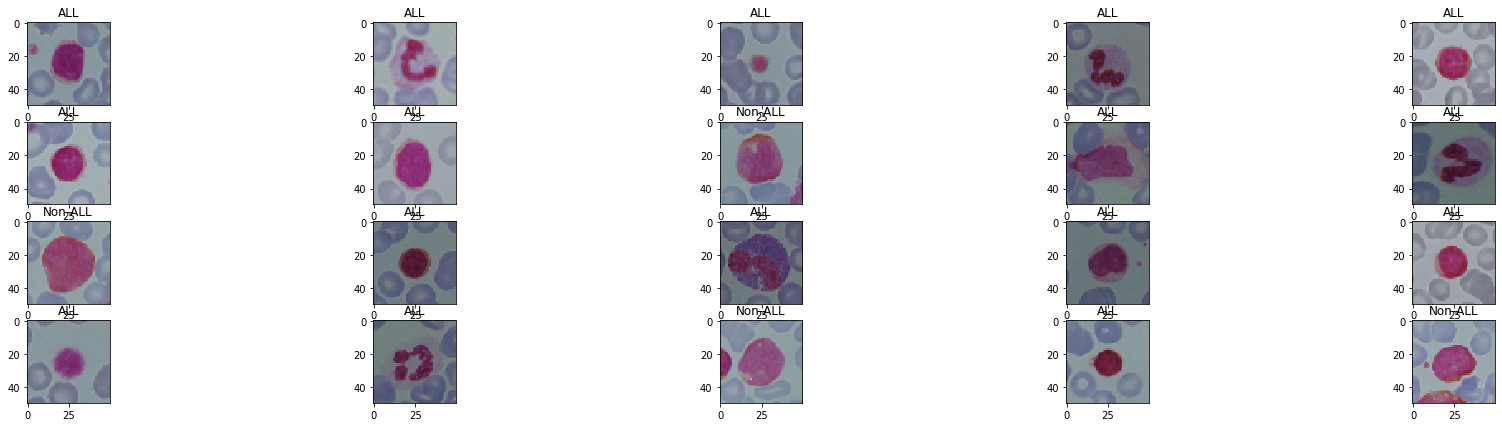

In [8]:
y = np.argmax(Label, axis=-1)
f, ax = plt.subplots(4, 5, figsize=(30, 7))

for i in range(0, 20):
    ax[i//5, i%5].imshow(Data[i])
    if y[i]==1:
        ax[i//5, i%5].set_title("Non-ALL")
    else:
        ax[i//5, i%5].set_title("ALL")

# Model Architecture
<img src="https://www.PeterMossAmlAllResearch.com/media/images/repositories/paper_1_architecture.png" alt="Proposed Architecture" />

_Fig 3. Proposed Architecture  ([Source](https://airccj.org/CSCP/vol7/csit77505.pdf "Source"))_  

## Proposed Architecture

In the [ACUTE LEUKEMIA CLASSIFICATION USING CONVOLUTION NEURAL NETWORK IN CLINICAL DECISION SUPPORT SYSTEM](https://airccj.org/CSCP/vol7/csit77505.pdf "ACUTE LEUKEMIA CLASSIFICATION USING CONVOLUTION NEURAL NETWORK IN CLINICAL DECISION SUPPORT SYSTEM") paper the authors explain the layers they used to create their convolutional neural network.

> "In this work, we proposed a network contains 4 layers. The first 3 layers for detecting features
and the other two layers (Fully connected and Softmax) are for classifying the features. The input
image has the size [50x50x3]. The receptive field (or the filter size) is 5x5. The stride is 1 then we
move the filters one pixel at a time. The zero-padding is 2. It will allow us to control the spatial
size of the output image (we will use it to exactly preserve the spatial size of the input volume so
the input and output width and height are the same). During the experiment, we found that in our
case, altering the size of original image during the convolution lead to decrease the accuracy
about 40%. Thus the output image after convolution layer 1 has the same size with the input
image."

> "The convolution layer 2 has the same structure with the convolution layer 1. The filter size is 5x5,
the stride is 1 and the zero-padding is 2. The number of feature maps (the channel or the depth) in
our case is 30. If the number of feature maps is lower or higher than 30, the accuracy will
decrease 50%. By experiment, we found the accuracy also decrease 50% if we remove
Convolution layer 2.""

> "The Max-Pooling layer 25x25 has Filter size is 2 and stride is 2. The fully connected layer has 2
neural. Finally, we use the Softmax layer for the classification. "

Like Amita & Taru's notebook, this notebook introduces droupout layers to avoid overfitting. In this case your network has two dropout layers both having different dropout rates. There is no mention of activations for the convolutional layers so **RELU** has been used.  

**To recreate the proposed architecture, execute the following code block:**

In [9]:
model = Sequential()
model.name="KAllCnn_IDB2"

model.add(ZeroPadding2D(padding=(2, 2), input_shape=X_train.shape[1:]))
model.add(Conv2D(30, (5, 5), strides=1, padding = "valid", input_shape = X_train.shape[1:], activation = 'relu'))
model.add(Dropout(0.4))

model.add(ZeroPadding2D(padding=(2, 2), input_shape=X_train.shape[1:]))
model.add(Conv2D(30, (5, 5), strides=1, padding = "valid", activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding = 'valid'))
model.add(Dropout(0.6))

model.add(Flatten())
model.add(Dense(2))
model.add(Activation("softmax"))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



## View Network Architecture (Summary)
**To view a summary of your networ architecture, execute the following code block:**

In [10]:
model.summary()

Model: "KAllCnn_IDB2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 54, 54, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 30)        2280      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50, 30)        0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 54, 54, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 30)        22530     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 30)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 25, 25, 30)       

# Compile &  Fit Your Model

In the following code block first the program complies the model, then fits the model. The **validation_data**, _(X_test, y_test)_, and the number of **validation_steps** are passed to the **Keras model.fit** function. This means that in addition to showing training loss, accuracy, precision and recall the program will show validation loss, accuracy, precision and recall in its output.

**Assuming you have completed all above steps you can execute the following code block to beging training:**


In [11]:
optimizer = keras.optimizers.rmsprop(lr = 0.0001, decay = 1e-6)
model.compile(loss = 'binary_crossentropy', optimizer = optimizer, 
              metrics = ['accuracy', keras_metrics.precision(), keras_metrics.recall()])

history = model.fit(X_train, y_train, validation_data = (X_test, y_test), validation_steps = val_steps, 
                    steps_per_epoch = int(len(X_train)/batch_size), epochs = epochs)
history



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 208 samples, validate on 52 samples





Epoch 1/100
20/20 [==============================] - 5s 267ms/step - loss: 0.7206 - acc: 0.5135 - precision: 0.5148 - recall: 0.4697 - val_loss: 0.6835 - val_acc: 0.5000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
20/20 [==============================] - 2s 77ms/step - loss: 0.6621 - acc: 0.6024 - precision: 0.6141 - recall: 0.5510 - val_loss: 0.6575 - val_acc: 0.7500 - val_precision: 0.8421 - val_recall: 0.6154
Epoch 3/100
20/20 [==============================] - 2s 76ms/step - loss: 0.6247 - acc: 0.6466 - precision: 0.6631 - recall: 0.5962 - val_loss: 0.6273 - val_acc: 0.7692 - val_precision: 0.7917 - val_recall: 0.7308
Epoch 4/100
20/20 [==============================] - 2s 76ms/step - loss: 0.5873 - acc: 0.6856 - precision: 0.7075 - recall: 0.6327 - val_loss: 0.6042 - val_acc: 0.7692 - val_precision: 0.7917 - val_r

# Evaluate Your Model
Now we will evaluate how well our model has done.

## View Metrics Names
**Execute the following code block to view the names of the metrics used during training:**

In [12]:
model.metrics_names

['loss', 'acc', 'precision', 'recall']

## Evaluate Model & Print Metrics
**Execute the following code block to evaluate your model and print the training metrics:**

In [13]:
score = model.evaluate(X_test, y_test, verbose=0)
score

[0.08396839837615307,
 0.9615384615384616,
 0.9615384578402366,
 0.9615384578402366]

## Generate AUC Score
**Execute the following code block to generate your AUC score:**

In [14]:
roc_auc_score(y_test, model.predict_proba(X_test))

0.9970414201183433

# Results

Below are the training results for 100 epochs.

| Loss   |  Accuracy   | Precision   | Recall   | AUC |
|------|---|---|--|--|
| 0.083 (~0.84)  | 0.961 (~96%)   | 0.961 (~0.96)   | 0.961 (~0.96) | 0.997 (~1.0) |

## Visualise Metrics

### Training Loss & Accuracy

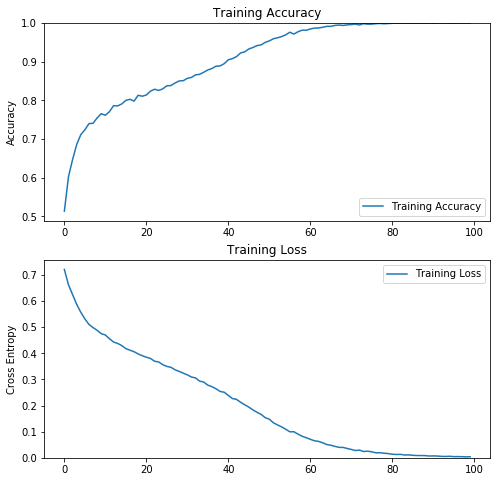

In [15]:
training_acc = history.history['acc']
training_loss = history.history['loss']

plt.figure(figsize = (8, 8))
plt.subplot(2, 1, 1)
plt.plot(training_acc, label = 'Training Accuracy')
plt.legend(loc = 'lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training Accuracy')

plt.subplot(2, 1, 2)
plt.plot(training_loss, label = 'Training Loss')
plt.legend(loc = 'upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training Loss')
plt.show()

### Validation Loss & Accuracy

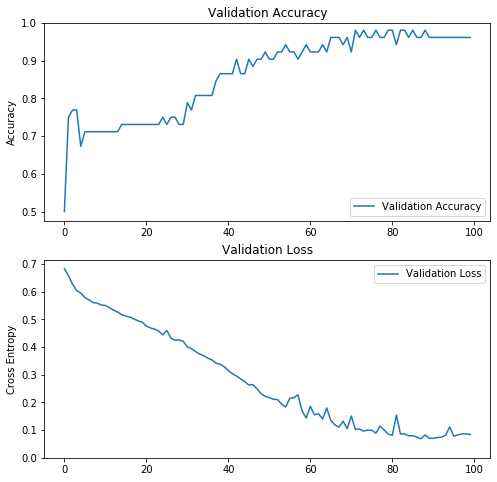

In [16]:
validation_acc = history.history['val_acc']
validation_loss = history.history['val_loss']

plt.figure(figsize = (8, 8))
plt.subplot(2, 1, 1)
plt.plot(validation_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(validation_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Validation Loss')
plt.show()

## Predictions

In [17]:
y_pred = model.predict(X_test)
y_pred

array([[9.9999940e-01, 5.8897302e-07],
       [9.9999976e-01, 2.0343715e-07],
       [9.9199718e-01, 8.0027673e-03],
       [9.5849141e-02, 9.0415090e-01],
       [8.7243891e-01, 1.2756117e-01],
       [3.6466299e-09, 1.0000000e+00],
       [3.3179110e-06, 9.9999666e-01],
       [1.2063768e-04, 9.9987936e-01],
       [4.9350643e-07, 9.9999952e-01],
       [9.9999702e-01, 2.9465098e-06],
       [9.9976021e-01, 2.3979064e-04],
       [9.8710191e-01, 1.2898162e-02],
       [9.9998748e-01, 1.2529519e-05],
       [9.9997604e-01, 2.3915021e-05],
       [5.8868172e-04, 9.9941134e-01],
       [2.8293201e-04, 9.9971706e-01],
       [1.8060839e-09, 1.0000000e+00],
       [9.9976581e-01, 2.3424970e-04],
       [9.9549943e-01, 4.5005716e-03],
       [9.9999976e-01, 2.3427557e-07],
       [2.4395626e-05, 9.9997556e-01],
       [1.3532301e-06, 9.9999869e-01],
       [1.8464297e-02, 9.8153573e-01],
       [1.7592744e-07, 9.9999988e-01],
       [9.9998844e-01, 1.1562862e-05],
       [9.9274492e-01, 7.

### Confusion Matrix

In [18]:
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
matrix

array([[25,  1],
       [ 1, 25]])

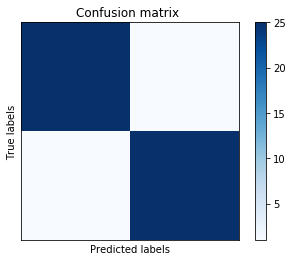

In [19]:
plt.imshow(matrix, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

## Results on ALL-IDB (Images)


In [20]:
TN = matrix[0][0]
FN = matrix[0][1]
TP = matrix[1][0]
FP = matrix[1][1]

(TP, FP, TN, FN)

(1, 25, 25, 1)

In [21]:
test_len = len(X_test)

TPP = (TP * 100) / test_len
FPP = (FP * 100) / test_len
FNP = (FN * 100) / test_len
TNP = (TN * 100) / test_len

(TPP, FPP, TNP, FNP)

(1.9230769230769231, 48.07692307692308, 48.07692307692308, 1.9230769230769231)

In [22]:
specificity = TN/(TN+FP) 
specificity

0.5

In [23]:
specificity = (specificity * 100) / test_len
specificity

0.9615384615384616

In [24]:
misc = FP + FN
misc

26

In [25]:
misc = (misc * 100) / test_len
misc

50.0

### Figures Of Merit


| Figures of merit  | Value | Percentage |
| ----------------  | ----- | ---------- |
| True Positives | 1 | 1.92% |
| False Positives | 25 | 48.08% 
| True Negatives | 25 | 48.08% |
| False Negatives | 1 | 1.92% |
| Misclassification | 26 | 50.00% |
| Sensitivity / Recall | 0.96 | 96% |
| Specificity | 0.5 | 50% |


# Save Your Keras Model

Now you will save your Keras model and weights so that they can be used again. 

## Save Model As Json

In [0]:
with open(model_path, "w") as file:
    file.write(model.to_json())

## Save Weights

In [0]:
model.save_weights(model_root_path + "/weights.h5")

# Load Your Saved Keras Model

In [28]:
with open(model_path, "r") as file:
    jmodel = file.read()

K.set_learning_phase(0)
model = model_from_json(jmodel)
model.load_weights(model_root_path + "/weights.h5")

model.summary()

Model: "KAllCnn_IDB2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 54, 54, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 30)        2280      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50, 30)        0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 54, 54, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 30)        22530     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 30)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 25, 25, 30)       

# Contributing

The Peter Moss Acute Myeloid & Lymphoblastic Leukemia AI Research project encourages and welcomes code contributions, bug fixes and enhancements from the Github.

**Please read the [CONTRIBUTING](https://github.com/AMLResearchProject/AML-ALL-Classifiers/blob/master/CONTRIBUTING.md "CONTRIBUTING") document for a full guide to forking our repositories and submitting your pull requests. You will also find information about our code of conduct on this page.**

## Acute Myeloid & Lymphoblastic Leukemia Classifiers Contributors

- [Adam Milton-Barker](https://github.com/AdamMiltonBarker "Adam Milton-Barker") - Bigfinite IoT Network Engineer & Intel Software Innovator, Barcelona, Spain
- [Salvatore Raieli](https://github.com/salvatorera "Salvatore Raieli") - PhD Immunolgy / Bioinformaticia, Bologna, Italy
- [Dr Amita Kapoor](https://github.com/salvatorera "Dr Amita Kapoor") - Delhi University, Delhi, India


# Versioning

We use SemVer for versioning. For the versions available, see [Releases](https://github.com/AMLResearchProject/AML-ALL-Classifiers/releases "Releases").

# License

This project is licensed under the **MIT License** - see the [LICENSE](https://github.com/AMLResearchProject/AML-ALL-Classifiers/blob/master/LICENSE "LICENSE") file for details.

# Bugs/Issues

We use the [repo issues](https://github.com/AMLResearchProject/AML-ALL-Classifiers/issues "repo issues") to track bugs and general requests related to using this project.